In [1]:
!pip install git+https://github.com/huggingface/transformers -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 7.6 MB 7.5 MB/s 
     |████████████████████████████████| 163 kB 63.0 MB/s 


In [2]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation
from PIL import Image
import requests

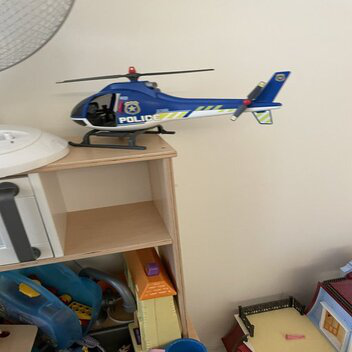

In [9]:
#url = "https://pbs.twimg.com/media/FfdpJLfXkAAFnQu?format=jpg&name=small"
image = Image.open('Helicopter.jpg')
image

In [10]:
processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [11]:
prompts = ["Helicopter "]

inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")

In [12]:
import torch
import matplotlib.pyplot as plt

In [13]:
# predict
with torch.no_grad():
  outputs = model(**inputs)

preds = outputs.logits

In [14]:
preds.shape

torch.Size([352, 352])

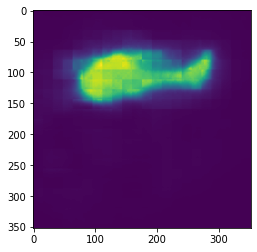

In [15]:
plt.imshow(torch.sigmoid(preds))

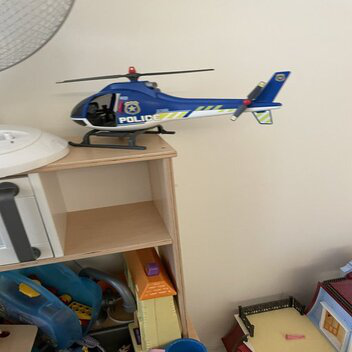

In [16]:
image

In [17]:
filename = f"mask.png"
plt.imsave(filename,torch.sigmoid(preds))

In [18]:
import cv2

In [19]:
img2 = cv2.imread(filename)

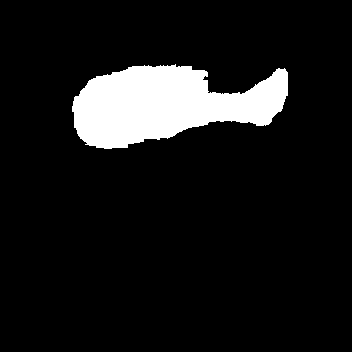

In [20]:
gray_image = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

(thresh, bw_image) = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)

# For debugging only:
cv2.imwrite(filename,bw_image)

# fix color format
cv2.cvtColor(bw_image, cv2.COLOR_BGR2RGB)

Image.fromarray(bw_image)

In [21]:
# init_image = Image.open('init_image.png')
mask = Image.open('mask.png')

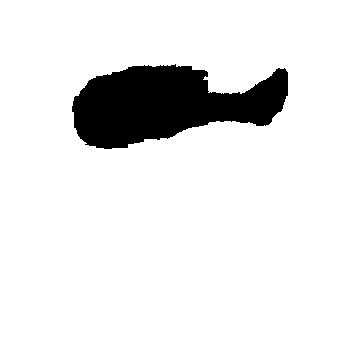

In [23]:
mask2 = cv2.bitwise_not(bw_image)
Image.fromarray(mask2)



In [24]:
cv2.imwrite('mask2.png', mask2)

True